In [1]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\sujan\anaconda3\envs\Project\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: scikit-learn-intelex


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [3]:
DATADIR = "D:\\IEEEModel\\Train"
CATEGORIES = ['Eco','OffRoad','Snow','Sports']
IMG_SIZE=100

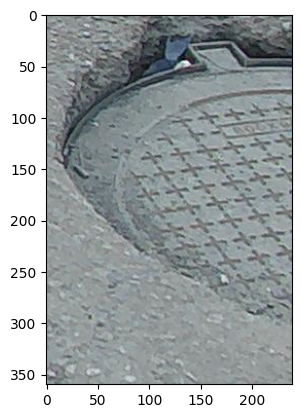

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [5]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()    

In [6]:
print(len(training_data))

80222


In [7]:
lenofimage = len(training_data)

In [8]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [9]:
X.shape

(80222, 30000)

In [10]:
X = X/255.0

In [11]:
y=np.array(y)

In [12]:
y.shape

(80222,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [14]:
#scikit learn decision tree model training 
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)

In [15]:
prediction = DT.predict(X_test)
prediction

array([3, 3, 0, ..., 3, 1, 3])

In [16]:
# evaluation for multi class classification
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.42      0.43      0.42      4071
           1       0.37      0.35      0.36      4022
           2       0.49      0.46      0.47      3986
           3       0.37      0.40      0.39      3966

    accuracy                           0.41     16045
   macro avg       0.41      0.41      0.41     16045
weighted avg       0.41      0.41      0.41     16045



In [17]:
DT.score(X_test, y_test)

0.4106575257089436

In [18]:
DT.score(X_train, y_train)

0.9999688361874192

In [19]:
#prediction
y_pred = DT.predict(X_test)

In [20]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.4106575257089436


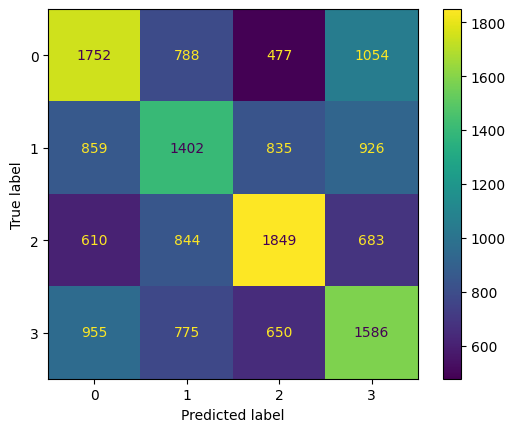

In [21]:
ConfusionMatrixDisplay.from_estimator(DT, X_test, y_test)